Epoch 1: Loss = 103.4200, Misclassified = 2
Epoch 2: Loss = 71.3600, Misclassified = 2
Epoch 3: Loss = 65.2000, Misclassified = 1
Epoch 4: Loss = 0.0000, Misclassified = 0
Epoch 5: Loss = 0.0000, Misclassified = 0
Epoch 6: Loss = 0.0000, Misclassified = 0
Epoch 7: Loss = 0.0000, Misclassified = 0
Epoch 8: Loss = 0.0000, Misclassified = 0
Epoch 9: Loss = 0.0000, Misclassified = 0
Epoch 10: Loss = 0.0000, Misclassified = 0


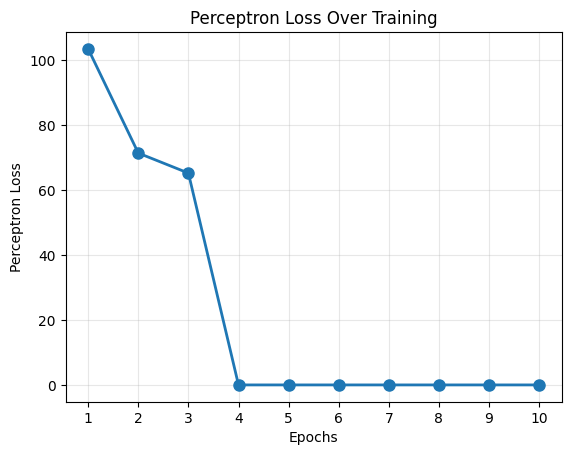

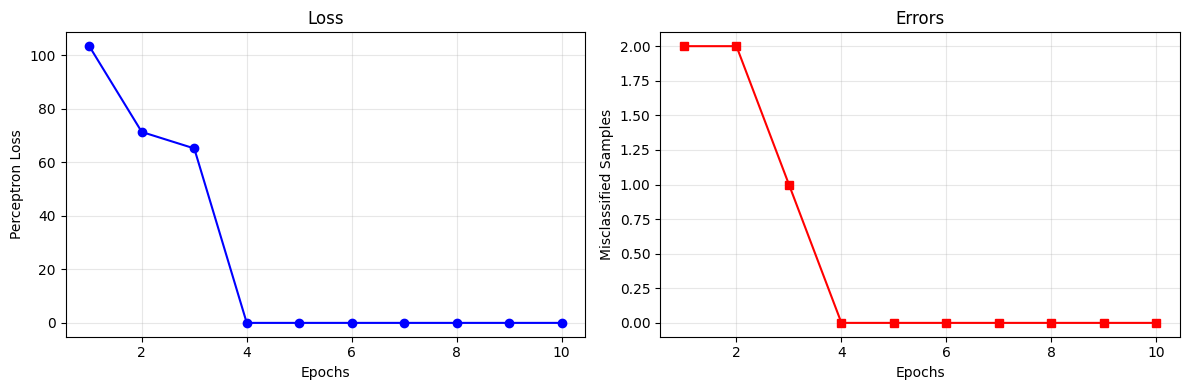

In [37]:
# Clear all variables and restart
%reset -f

import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load and prepare data
def load_data():
    URL_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header=None)
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1] == 'Iris-setosa', -1, 1)
    data = np.asmatrix(data, dtype='float64')
    return data

data = load_data()

#Define the perceptron function 
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]

    w = np.ones(shape=(1, features.shape[1]+1))
    misclassified_ = []
    ploss_ = []
    
    for epoch in range(num_iter):
        misclassified = 0
        ploss = 0.0
        
        for x, label in zip(features, labels):
            x = np.array(x).flatten()
            x = np.insert(x, 0, 1)
            
            y = np.dot(w, x)
            if isinstance(y, np.ndarray):
                y = y.item()  # Extract scalar properly
            
            label_val = label.item(0, 0) if hasattr(label, 'item') else label
            
            target = 1.0 if y > 0 else -1.0
            delta = label_val - target
            
            loss_term = -label_val * y
            ploss += max(0.0, loss_term)
            
            if delta != 0:
                misclassified += 1
                w += delta * x
        
        ploss_.append(float(ploss))
        misclassified_.append(misclassified)
        print(f"Epoch {epoch+1}: Loss = {ploss:.4f}, Misclassified = {misclassified}")
    
    return (w, misclassified_, ploss_)

#Run the perceptron
num_iter = 10
w, misclassified_, ploss_ = perceptron(data, num_iter)

# 5. Plot (this should work now)
epochs = np.arange(1, num_iter + 1)
plt.plot(epochs, ploss_, marker='o', linewidth=2, markersize=8)
plt.xlabel('Epochs')
plt.ylabel('Perceptron Loss')
plt.title('Perceptron Loss Over Training')
plt.grid(True, alpha=0.3)
plt.xticks(epochs)  # Show all epoch numbers
plt.show()

# Also plot misclassified
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, ploss_, marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Perceptron Loss')
plt.grid(True, alpha=0.3)
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, misclassified_, marker='s', color='red')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')
plt.grid(True, alpha=0.3)
plt.title('Errors')

plt.tight_layout()
plt.show()

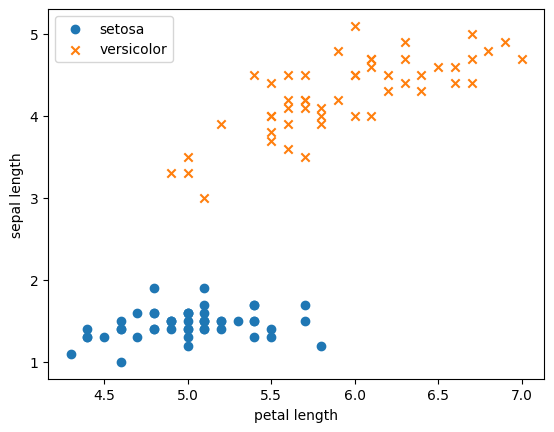

In [38]:
data2 = data[:100,[0,2,4]]
w = -10*np.ones(shape=(1, 3))
plt.scatter(np.array(data2[:50,0]), np.array(data2[:50,1]), marker='o', label='setosa')
plt.scatter(np.array(data2[50:,0]), np.array(data2[50:,1]), marker='x', label='versicolor')
x1 = np.linspace(3,8,50)
x2 = -w[0,0]/w[0,1]*x1 - w[0,2]/w[0,1]
#plt.plot(x1,x2)
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

Epoch 1: Loss = 81.3600, Misclassified = 2
Epoch 2: Loss = 52.3600, Misclassified = 2
Epoch 3: Loss = 114.2400, Misclassified = 3
Epoch 4: Loss = 37.4600, Misclassified = 1
Epoch 5: Loss = 0.0000, Misclassified = 0
Epoch 6: Loss = 0.0000, Misclassified = 0
Epoch 7: Loss = 0.0000, Misclassified = 0
Epoch 8: Loss = 0.0000, Misclassified = 0
Epoch 9: Loss = 0.0000, Misclassified = 0
Epoch 10: Loss = 0.0000, Misclassified = 0

Final weights: [[-3.  -7.6 15.2]]
Misclassified per epoch: [2, 2, 3, 1, 0, 0, 0, 0, 0, 0]
Loss per epoch: [81.35999999999999, 52.359999999999985, 114.24000000000001, 37.46000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


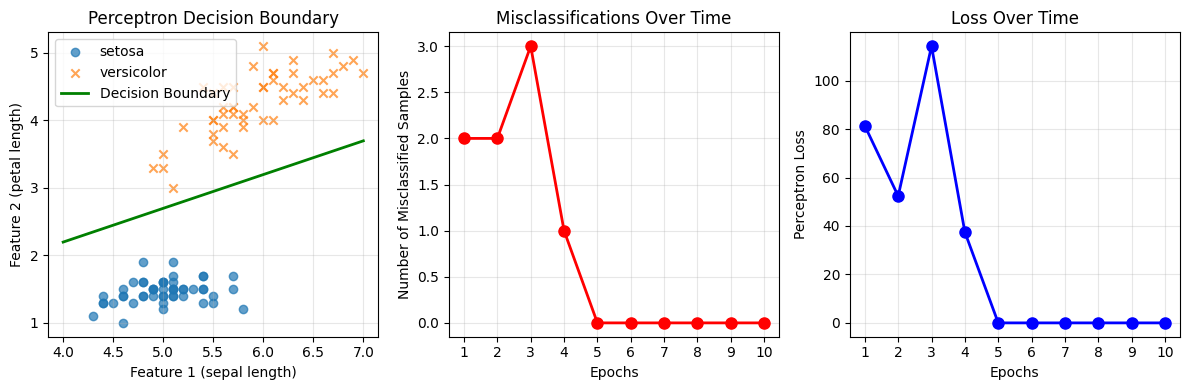

In [40]:
# First, make sure we have the right data
# If you're using data2, define it properly
# For Iris, let's use columns 0 and 2 for features (sepal length, petal length)
data2 = data[:, [0, 2, 4]]  # Features: columns 0 and 2, Labels: column 4

# Corrected perceptron function
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # Initialize weights
    w = np.ones(shape=(1, features.shape[1] + 1))
    misclassified_ = []
    ploss_ = []
    
    for epoch in range(num_iter):
        misclassified = 0
        ploss = 0.0
        
        for x, label in zip(features, labels):
            # Add bias term
            x = np.insert(x, 0, 1)
            x = np.array(x).flatten()
            
            # Calculate prediction
            y = np.dot(w, x)
            if isinstance(y, np.ndarray):
                y = y.item()
            
            # Get label value
            if hasattr(label, 'item'):
                label_val = label.item(0, 0)
            else:
                label_val = label
            
            # Target and delta
            target = 1.0 if y > 0 else -1.0
            delta = label_val - target
            
            # Loss calculation
            loss_term = -label_val * y
            ploss += max(0.0, loss_term)
            
            # Update weights if misclassified
            if delta != 0:
                misclassified += 1
                w += delta * x
        
        misclassified_.append(misclassified)
        ploss_.append(float(ploss))
        print(f"Epoch {epoch+1}: Loss = {ploss:.4f}, Misclassified = {misclassified}")
    
    return w, misclassified_, ploss_

# Run perceptron
num_iter = 10
w, misclassified_, ploss_ = perceptron(data2, num_iter)

# Print results
print(f"\nFinal weights: {w}")
print(f"Misclassified per epoch: {misclassified_}")
print(f"Loss per epoch: {ploss_}")

# Plot 1: Decision Boundary
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
# Create decision boundary
x1 = np.linspace(4, 7, 50)
x2 = -w[0, 1] * x1 / w[0, 2] - w[0, 0] / w[0, 2]

# Plot data points
plt.scatter(np.array(data2[:50, 0]), np.array(data2[:50, 1]), 
            marker='o', label='setosa', alpha=0.7)
plt.scatter(np.array(data2[50:, 0]), np.array(data2[50:, 1]), 
            marker='x', label='versicolor', alpha=0.7)
plt.plot(x1, x2, 'g-', linewidth=2, label='Decision Boundary')
plt.xlabel('Feature 1 (sepal length)')
plt.ylabel('Feature 2 (petal length)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Misclassifications
plt.subplot(1, 3, 2)
epochs = np.arange(1, num_iter + 1)
plt.plot(epochs, misclassified_, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassified Samples')
plt.title('Misclassifications Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(epochs)

# Plot 3: Perceptron Loss
plt.subplot(1, 3, 3)
plt.plot(epochs, ploss_, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Epochs')
plt.ylabel('Perceptron Loss')
plt.title('Loss Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(epochs)

plt.tight_layout()
plt.show()